# Perfect Plot: Classification charts
data source: https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
df = pd.read_csv ('/home/wojciech/Pulpit/1/AirQualityUCI.csv', sep=';')
df.head(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN


### Deletes the -200 variable indicating a data error

In [3]:
df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']] = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']].replace(-200,np.NaN)

### Deletes invalid records

In [4]:
del df['NMHC(GT)']
del df['Unnamed: 15']
del df['Unnamed: 16']

print(df.shape)
df.isnull().sum()
df = df.dropna(how='any')
print(df.shape)
print(df.isnull().sum())

(9471, 14)
(7393, 14)
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


### Replace variables with numeric values

In [5]:
print(df.dtypes)

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object


In [6]:
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.')

In [7]:
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.')

In [8]:
df['T'] = df['T'].str.replace(',', '.')

In [9]:
df['RH'] = df['RH'].str.replace(',', '.')

In [10]:
df['AH'] = df['AH'].str.replace(',', '.')

In [11]:
df[['CO(GT)', 'PT08.S1(CO)',  'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']] = df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']].astype(float)

### We choose the test kit

In [12]:
df2= df[['PT08.S4(NO2)','PT08.S3(NOx)','PT08.S2(NMHC)','AH','C6H6(GT)']]

### Encodes the resulting categorical variable - C6H6 (GT)

max: 63.7
min: 0.1


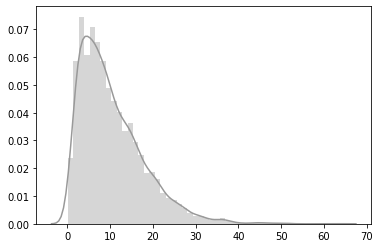

In [13]:
print('max:',df2['C6H6(GT)'].max())
print('min:',df2['C6H6(GT)'].min())

sns.distplot(np.array(df['C6H6(GT)']),color='#999999')

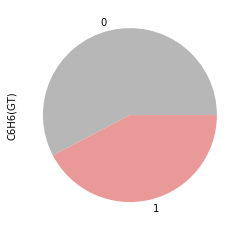

In [14]:
df2['C6H6(GT)'] = df['C6H6(GT)'].apply(lambda x: 1 if x > 10 else 0)
df2['C6H6(GT)'].value_counts(dropna = False, normalize=True).plot(kind='pie',colors=['#b7b7b7','#ea9999'])

In [15]:
X = df2.drop('C6H6(GT)', axis=1) 
y = df2['C6H6(GT)']  

### Data for the chart

In [16]:
y= y.to_frame()
y.head(5)

,C6H6(GT)
0,1
1,0
2,0
3,0
4,0


In [17]:
df2.head(3)

,PT08.S4(NO2),PT08.S3(NOx),PT08.S2(NMHC),AH,C6H6(GT)
0,1692.0,1056.0,1046.0,0.7578,1
1,1559.0,1174.0,955.0,0.7255,0
2,1555.0,1140.0,939.0,0.7502,0


### Classification chart

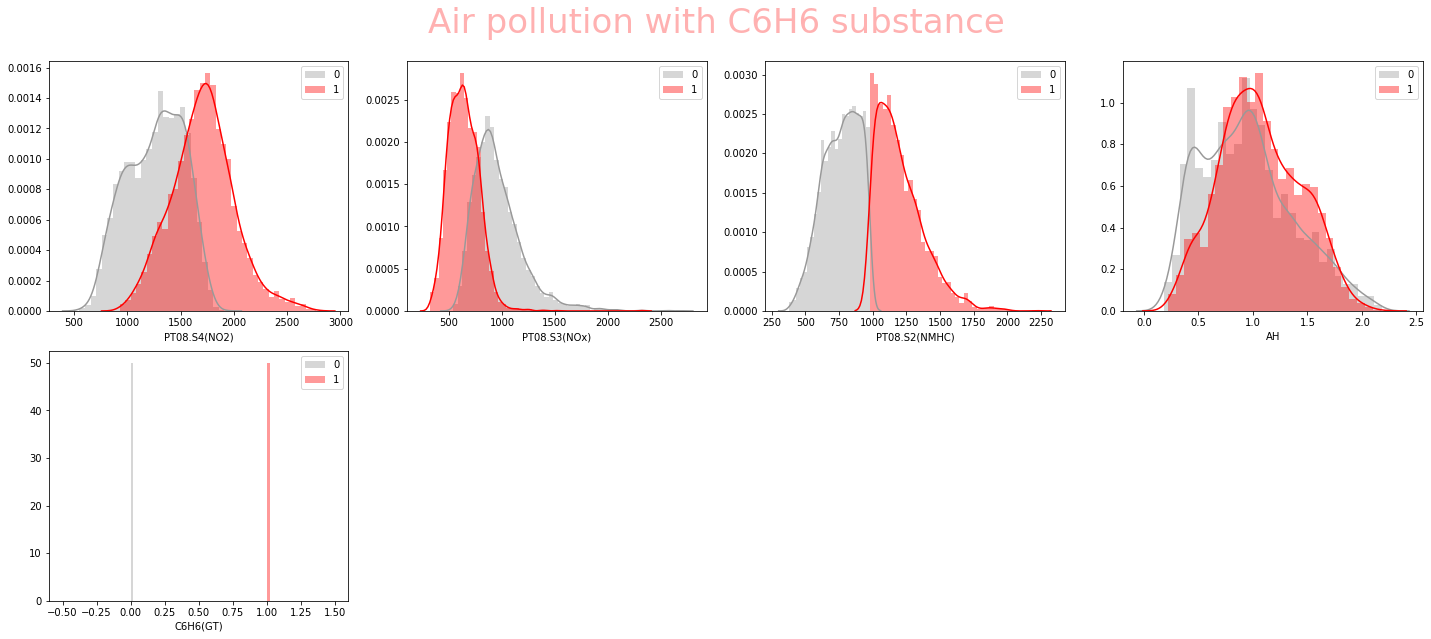

In [18]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df2.columns:
    plt.subplot(6, 4, j+1)
    j = 1+j
    sns.distplot(df2[i][y['C6H6(GT)']==0], color='#999999', label = '0')
    sns.distplot(df2[i][y['C6H6(GT)']==1], color='#ff0000', label = '1')
    plt.legend(loc='best',fontsize=10)
fig.suptitle('Air pollution with C6H6 substance',fontsize=34,color='#ff0000',alpha=0.3)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### Definicja

In [19]:
def scientist_plot(data, y, AAA, Title):
    fig = plt.figure(figsize = (20, 25))
    j = 0
    for i in df2.columns:
        plt.subplot(6, 4, j+1)
        j = 1+j
        sns.distplot(data[i][y[AAA]==0], color='#ffff00', label = 'acceptable norm')
        sns.distplot(data[i][y[AAA]==1], color='#4a86e8', label = 'norm exceeded')
        plt.legend(loc='best',fontsize=10)
    fig.suptitle(Title,fontsize=34,color='#4a86e8',alpha=0.5)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()

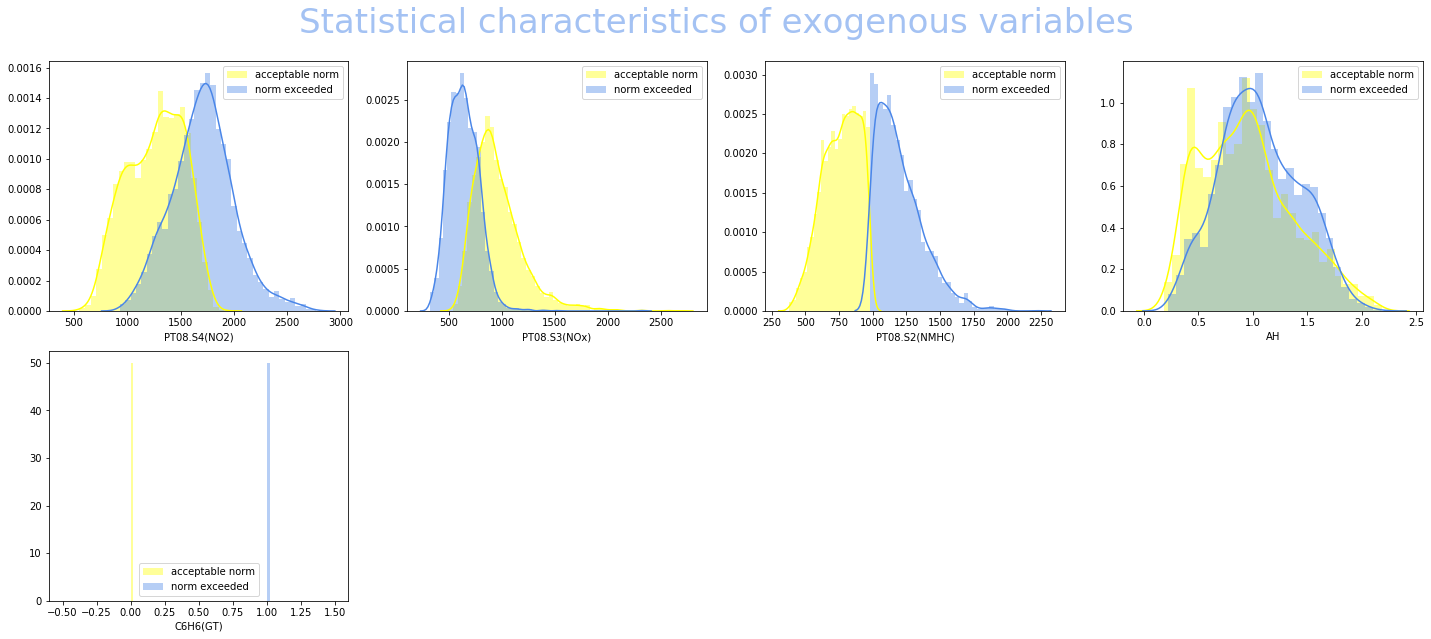

In [20]:
scientist_plot(df2, y, 'C6H6(GT)','Statistical characteristics of exogenous variables')

### Dispersion matrix for classification

<Figure size 1440x1800 with 0 Axes>

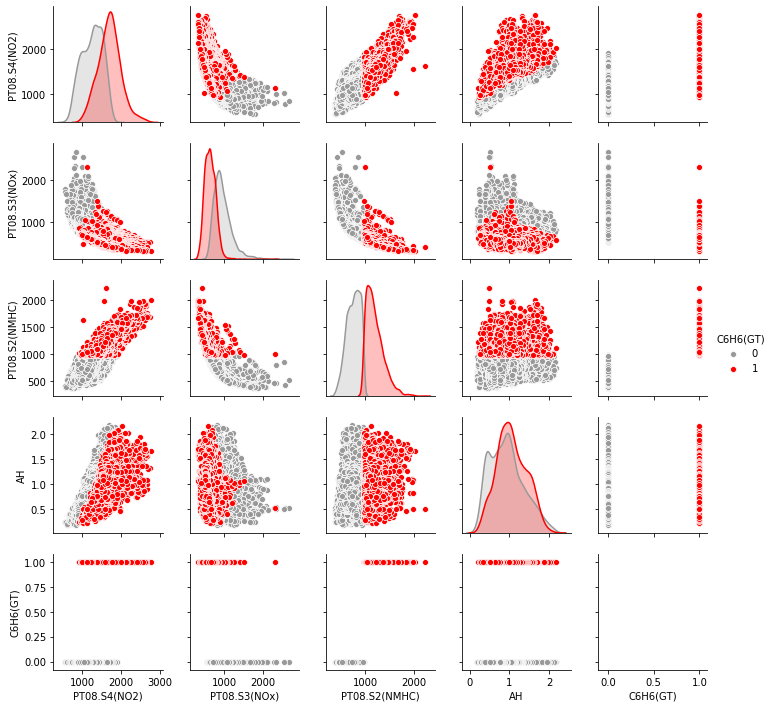

In [21]:
fig = plt.figure(figsize = (20, 25))
kot = ['#999999','#ff0000']
sns.pairplot(data=df2[['PT08.S4(NO2)','PT08.S3(NOx)','PT08.S2(NMHC)','AH','C6H6(GT)']], hue='C6H6(GT)', dropna=True, height=2, palette=kot)
fig.suptitle('Air pollution with C6H6 substance',fontsize=34,color='#ff0000',alpha=0.3)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()